In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import FuncFormatter

import warnings
warnings.filterwarnings('ignore')


# set up formatting for x axis time values
monthfmt = DateFormatter("%b")
yearfmt = DateFormatter("%Y")

def combinedfmt(x,pos):
    string = monthfmt(x)
    if string == "Jan":
        string += "\n" + yearfmt(x)
    return string

def format_date_ax(ax):
    ax.xaxis.set_major_locator(MonthLocator((1,4,7,10)))
    ax.xaxis.set_major_formatter(FuncFormatter(combinedfmt))
    plt.setp(ax.get_xticklabels(), rotation=0, horizontalalignment='center');
    return None

---

#### Original GOES ABI Brightness Temperature Summary Statistics

In [2]:
# open csv file with summary stats
df_original_tb = pd.read_csv('goes_modis_aster_original_tb_summary_stats.csv')
# set datetime to aster_datetime
df_original_tb['datetime'] = pd.to_datetime(df_original_tb.time.copy())
# uset this as the index
df_original_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_original_tb['ast_mod_r2_value'] = df_original_tb.ast_mod_r_value.copy()**2
df_original_tb['ast_goes_r2_value'] = df_original_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 50000
df_original_tb = df_original_tb.where(df_original_tb.ast_mod_n >= 50000)

# Drop observation from 2019-05-13 18:51:22 (cloudy)
drop_idx_list = [df_original_tb.index[i] for i in [14]]
df_original_tb.drop(drop_idx_list, inplace=True)

# preview
#df_original_tb.head(1)

#### Orthorectified GOES ABI Brightness Temperature Summary Statistics

In [3]:
# open csv file with summary stats
df_ortho_tb = pd.read_csv('goes_modis_aster_orthorectified_tb_summary_stats.csv')
# set datetime to aster_datetime
df_ortho_tb['datetime'] = pd.to_datetime(df_ortho_tb.time.copy())
# uset this as the index
df_ortho_tb.set_index('datetime', inplace=True)

# add an R-squared column for each diff
df_ortho_tb['ast_mod_r2_value'] = df_ortho_tb.ast_mod_r_value.copy()**2
df_ortho_tb['ast_goes_r2_value'] = df_ortho_tb.ast_goes_r_value.copy()**2

# filter out anything with Number of Pixels < 50000
df_ortho_tb = df_ortho_tb.where(df_ortho_tb.ast_mod_n >= 50000)
# Drop observation from 2019-05-13 18:51:22 (cloudy)
#df_ortho_tb.drop(drop_idx_list, inplace=True)
# preview
#df_ortho_tb.head(1)

---

### Plot Brightness Temperature Summary Stats Together

In [4]:
# Make difference dataframe
df_change_tb = df_ortho_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath']) - \
               df_original_tb.drop(columns=['Unnamed: 0', 'time', 
                                         'aster_rad_filepath', 
                                         'modis_rad_filepath', 
                                         'goes_rad_filepath', 'goes_tb_filepath', 'goes_zones_filepath'])

What is the mean difference between all MODIS and ASTER image pairs (the baseline)?
-0.16353701549398905
What is the mean difference between all GOES and ASTER image pairs BEFORE orthorectifying?
1.6177355699388598
What is the mean difference between all GOES and ASTER image pairs AFTER orthorectifying?
1.0486163885476443


When do the maximum mean differences between MODIS and ASTER image pairs occur (the baseline)?
datetime
2020-01-23 06:06:58    0.723017
2017-06-07 06:07:10    0.654649
2018-04-08 18:51:46    0.544864
2020-01-07 06:06:41    0.503547
2018-12-19 06:07:13    0.480709
Name: ast_mod_mean_diff, dtype: float64
When do the maximum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?
datetime
2018-04-08 18:51:46    4.949046
2019-04-27 18:51:22    4.608244
2020-04-13 18:51:17    3.400417
2017-05-23 18:51:10    3.160059
2018-05-17 18:58:31    2.353981
Name: ast_goes_mean_diff, dtype: float64
When do the maximum mean differences between GOES and AS

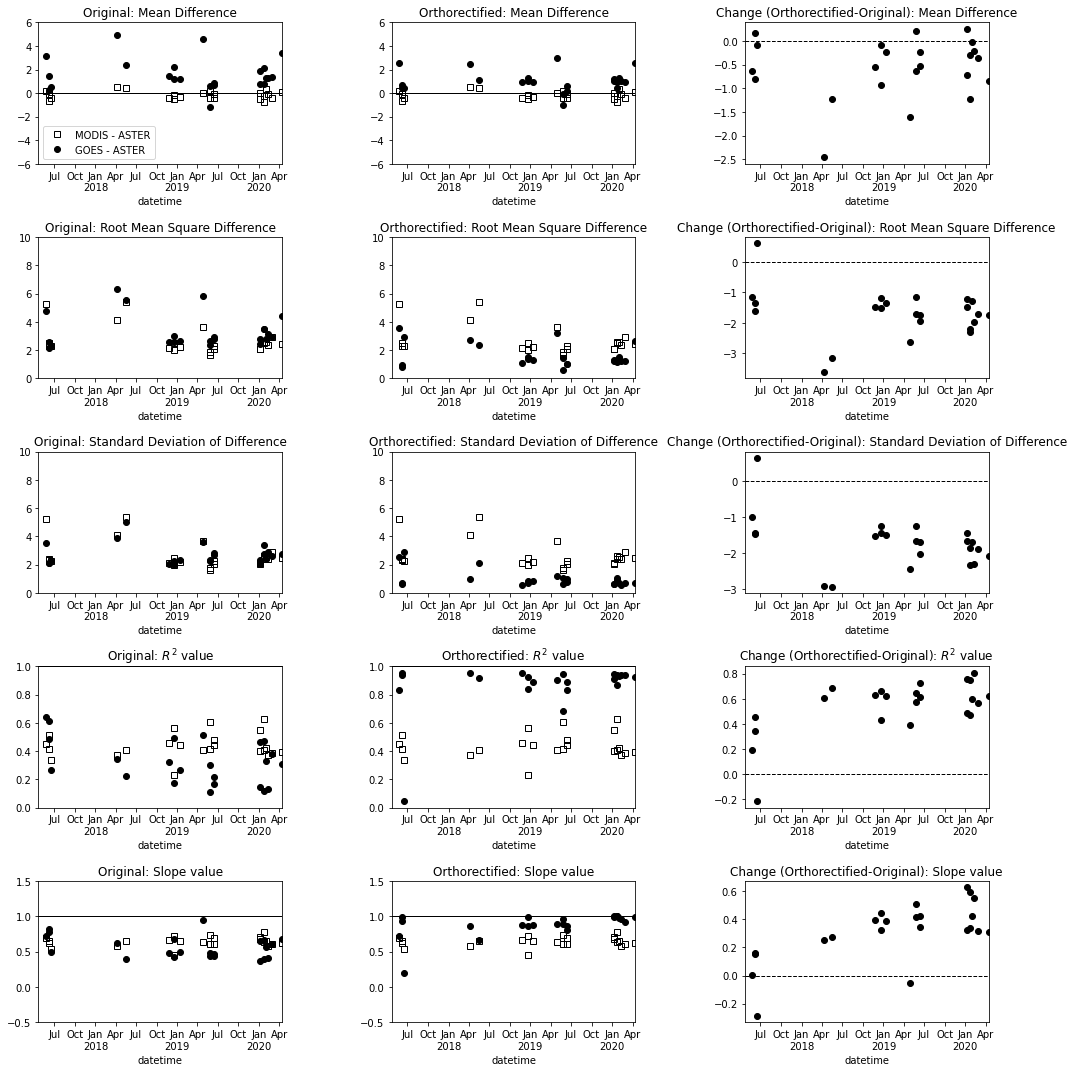

In [5]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='GOES - ASTER')
ax[0].set_title('Original: Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
df_original_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[3],  label='GOES - ASTER')
ax[3].set_title('Original: Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
df_original_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[6],  label='GOES - ASTER')
ax[6].set_title('Original: Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
df_original_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[9],  label='GOES : ASTER')
ax[9].set_title('Original: $R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
df_original_tb.ast_goes_slope.plot(linestyle='none',marker='o',  c='k', ax=ax[12],  label='GOES : ASTER')
ax[12].set_title('Original: Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[1], label='MODIS - ASTER')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[1], label='GOES - ASTER')
ax[1].set_title('Orthorectified: Mean Difference')
ax[1].set_ylim(-6,6)
ax[1].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[4], label='MODIS - ASTER')
df_ortho_tb.ast_goes_rms_diff.plot(linestyle='none',marker='o',  c='k', ax=ax[4],  label='GOES - ASTER')
ax[4].set_title('Orthorectified: Root Mean Square Difference')
ax[4].set_ylim(0,10)
ax[4].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[7], label='MODIS - ASTER')
df_ortho_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[7],  label='GOES - ASTER')
ax[7].set_title('Orthorectified: Standard Deviation of Difference')
ax[7].set_ylim(0,10)

df_ortho_tb.ast_mod_r2_value.plot(linestyle='none',marker='s',  mfc='none', mec='k', ax=ax[10], label='MODIS : ASTER')
df_ortho_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[10],  label='GOES : ASTER')
ax[10].set_title('Orthorectified: $R^2$ value')
ax[10].set_ylim(0,1)
ax[10].axhline(1,c='k',linewidth=1)

df_ortho_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[13], label='MODIS : ASTER')
df_ortho_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[13],  label='GOES : ASTER')
ax[13].set_title('Orthorectified: Slope value')
ax[13].set_ylim(-0.5,1.5)
ax[13].axhline(1,c='k',linewidth=1)


### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='GOES - ASTER')
ax[2].set_title('Change (Orthorectified-Original): Mean Difference')
#ax[2].set_ylim(-3,3)
ax[2].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_rms_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[5],  label='GOES - ASTER')
ax[5].set_title('Change (Orthorectified-Original): Root Mean Square Difference')
#ax[5].set_ylim(-5,5)
ax[5].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_std_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[8],  label='GOES - ASTER')
ax[8].set_title('Change (Orthorectified-Original): Standard Deviation of Difference')
#ax[8].set_ylim(-5,5)
ax[8].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_r2_value.plot(linestyle='none', marker='o',  c='k', ax=ax[11],  label='GOES : ASTER')
ax[11].set_title('Change (Orthorectified-Original): $R^2$ value')
#ax[11].set_ylim(-1,1)
ax[11].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_slope.plot(linestyle='none', marker='o',  c='k', ax=ax[14],  label='GOES : ASTER')
ax[14].set_title('Change (Orthorectified-Original): Slope value')
#ax[14].set_ylim(-1,1)
ax[14].axhline(0,c='k',linestyle='--',linewidth=1)

for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')

print('What is the mean difference between all MODIS and ASTER image pairs (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.mean()))
print('What is the mean difference between all GOES and ASTER image pairs BEFORE orthorectifying?\n{}'.format(df_original_tb.ast_goes_mean_diff.mean()))
print('What is the mean difference between all GOES and ASTER image pairs AFTER orthorectifying?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.mean()))
print('\n')
print('When do the maximum mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.abs().sort_values(ascending=False).head()))
print('When do the maximum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.abs().sort_values(ascending=False).head()))
print('When do the maximum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.abs().sort_values(ascending=False).head()))
print('\n')
print('When do the minimum mean differences between MODIS and ASTER image pairs occur (the baseline)?\n{}'.format(df_original_tb.ast_mod_mean_diff.abs().sort_values(ascending=True).head()))
print('When do the minimum mean differences between GOES and ASTER image pairs occur (BEFORE orthorectifying)?\n{}'.format(df_original_tb.ast_goes_mean_diff.abs().sort_values(ascending=True).head()))
print('When do the minimum mean differences between GOES and ASTER image pairs occur (AFTER orthorectifying)?\n{}'.format(df_ortho_tb.ast_goes_mean_diff.abs().sort_values(ascending=True).head()))
print('\n')
print('GOES imagery at what time of year benefitted the most from orthorectification?\n{}'.format(df_change_tb.ast_goes_mean_diff.sort_values(ascending=False)))
print('\n')
print('\n')
print('What is the mean R-squared between all MODIS and ASTER image pairs (the baseline)?\n{}'.format(df_original_tb.ast_mod_r2_value.mean()))
print('What is the mean R-squared between all GOES and ASTER image pairs BEFORE orthorectifying?\n{}'.format(df_original_tb.ast_goes_r2_value.mean()))
print('What is the mean R-squared between all GOES and ASTER image pairs AFTER orthorectifying?\n{}'.format(df_ortho_tb.ast_goes_r2_value.mean()))
print('Change in R-squared sorted:\n{}'.format(df_change_tb.ast_goes_r2_value.sort_values(ascending=False)))
print('\n')
print('\n')
print('What is the mean standard deviation between all MODIS and ASTER image pairs (the baseline)?\n{}'.format(df_original_tb.ast_mod_std_diff.mean()))
print('What is the mean standard deviation between all GOES and ASTER image pairs BEFORE orthorectifying?\n{}'.format(df_original_tb.ast_goes_std_diff.mean()))
print('What is the mean standard deviation between all GOES and ASTER image pairs AFTER orthorectifying?\n{}'.format(df_ortho_tb.ast_goes_std_diff.mean()))
print('Change in standard deviation sorted:\n{}'.format(df_change_tb.ast_goes_std_diff.sort_values(ascending=False)))

In [79]:
print('Three image pairs didnt improve their mean difference values, but how do their standard deviations look?')
print('What were their original standard deviations of difference?')
print(df_original_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_std_diff)
print(df_original_tb.loc[pd.Timestamp('2019-05-28 06:07:27')].ast_goes_std_diff)
print(df_original_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_std_diff)
print('What were their new standard deviations of difference?')
print(df_ortho_tb.loc[pd.Timestamp('2020-01-07 06:06:50')].ast_goes_std_diff)
print(df_ortho_tb.loc[pd.Timestamp('2019-05-28 06:07:27')].ast_goes_std_diff)
print(df_ortho_tb.loc[pd.Timestamp('2017-06-07 06:07:19')].ast_goes_std_diff)

Three image pairs didnt improve their mean difference values, but how do their standard deviations look?
What were their original standard deviations of difference?
2.3165099768178083
2.318433084004901
2.1184149336325793
What were their new standard deviations of difference?
0.6598613463172209
1.086202529479917
0.6498958156756192


Make some bigger, easier to read plots:

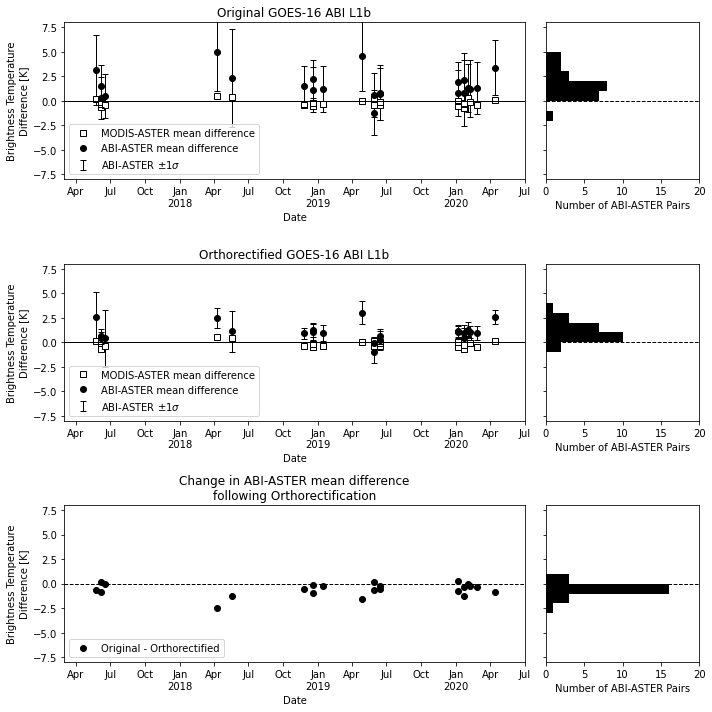

In [67]:
fig, axes = plt.subplots(3,2,figsize=(10,10), tight_layout=True, sharey=True,
                           gridspec_kw={'width_ratios': [3, 1]})

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='w', mec='k', ax=ax[0], label='MODIS-ASTER mean difference')
df_original_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k',  ax=ax[0], label='ABI-ASTER mean difference')
ax[0].errorbar(x=df_original_tb.index, 
               y=df_original_tb.ast_goes_mean_diff, 
               yerr=df_original_tb.ast_goes_std_diff,
               fmt='none', label='ABI-ASTER $\pm 1 \sigma$', color='k', linewidth=1, capsize=3)
ax[0].set_title('Original GOES-16 ABI L1b')
ax[0].axhline(0,c='k',linewidth=1)

df_original_tb.ast_goes_mean_diff.hist(ax=ax[1],
                                      bins=range(-8,8),
                                      orientation='horizontal',
                                      color = '#000000',
                                      ec='none',
                                      lw=1,
                                      grid=False)
ax[1].axhline(0,c='k',linestyle='--',linewidth=1)
ax[1].set_xlim(0,20)
ax[1].set_xlabel('Number of ABI-ASTER Pairs')

### Orthorectified stats

df_ortho_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='w', mec='k', ax=ax[2], label='MODIS-ASTER mean difference')
df_ortho_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[2], label='ABI-ASTER mean difference')
ax[2].errorbar(x=df_ortho_tb.index, 
               y=df_ortho_tb.ast_goes_mean_diff, 
               yerr=df_ortho_tb.ast_goes_std_diff,
               fmt='none', label='ABI-ASTER $\pm 1 \sigma$', color='k', linewidth=1, capsize=3)
ax[2].set_title('Orthorectified GOES-16 ABI L1b')
ax[2].axhline(0,c='k',linewidth=1)

df_ortho_tb.ast_goes_mean_diff.hist(ax=ax[3],
                                      bins=range(-8,8),
                                      orientation='horizontal',
                                      color = '#000000',
                                      ec='none',
                                      lw=1,
                                      grid=False)
ax[3].axhline(0,c='k',linestyle='--',linewidth=1)
ax[3].set_xlim(0,20)
ax[3].set_xlabel('Number of ABI-ASTER Pairs')



### Change (original - ortho) stats
# skipping MODIS - ASTER since there is no change
df_change_tb.ast_goes_mean_diff.plot(linestyle='none', marker='o',  c='k', ax=ax[4], label='Original - Orthorectified')
ax[4].set_title('Change in ABI-ASTER mean difference\nfollowing Orthorectification')
#ax[2].set_ylim(-3,3)
ax[4].axhline(0,c='k',linestyle='--',linewidth=1)

df_change_tb.ast_goes_mean_diff.hist(ax=ax[5],
                                      bins=range(-8,8),
                                      orientation='horizontal',
                                      color = '#000000',
                                      ec='none',
                                      lw=1,
                                      grid=False)
ax[5].axhline(0,c='k',linestyle='--',linewidth=1)
ax[5].set_xlim(0,20)
ax[5].set_xlabel('Number of ABI-ASTER Pairs')



for this_ax in [ax[0], ax[2], ax[4]]:
    format_date_ax(this_ax)
    this_ax.set_ylim(-8,8)
    this_ax.set_xlim(pd.Timestamp('2017-03-01'),pd.Timestamp('2020-07-01'))
    this_ax.legend(loc='lower left')
    this_ax.set_xlabel('Date')
    this_ax.set_ylabel('Brightness Temperature\nDifference [K]')
    #this_ax.legend(loc='best')

---

Is GOES biased warmer than ASTER especially when trees (tair proxy for trees) are much warmer than the snow surface? Assuming here that GOES is seeing more trees than ASTER is seeing due to its off-nadir view angle..

Read in the ground based data timeseries for Gaylor Pit and CUES sites

In [6]:
tuol_df = pd.read_pickle('data/goes-tuolumne_2017-2020.pkl')
tuol_df['timeUTC'] = tuol_df.index + pd.Timedelta(hours=8)
tuol_df.set_index('timeUTC',inplace=True)
tuol_ds = tuol_df.to_xarray().squeeze()

cues_df = pd.read_pickle('data/goes-cues_2017-2020.pkl')
cues_df['timeUTC'] = cues_df.index + pd.Timedelta(hours=8)
cues_df.set_index('timeUTC',inplace=True)
cues_ds = cues_df.to_xarray().squeeze()

Select Tss and Tair from both sites for the date/time of the GOES/MODIS/ASTER images for comparison

In [7]:
_tuol_ds = tuol_ds.sel(timeUTC=df_ortho_tb.index.values, method='nearest')
tuol_tss = _tuol_ds.tss
tuol_tair = _tuol_ds.air_temp_c  
tuol_tdelta = tuol_tair - tuol_tss
_cues_ds = cues_ds.sel(timeUTC=df_ortho_tb.index.values, method='nearest')
cues_tss = _cues_ds['snow surface temperature; Apogee SI-111 thermal radiometer; (Celsius)']
cues_tair = _cues_ds['Platform temperature; platform temperature/relative humidity; (degrees Celsius)']
cues_tdelta = cues_tair - cues_tss

**Plot tss, tair, tdelta, for both sites against GOES-ASTER difference to see if there is a pattern somewhere**

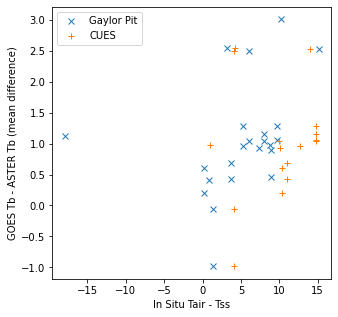

In [8]:
from scipy import stats

plt.figure(figsize=(5,5))
plt.plot(tuol_tdelta, df_ortho_tb.ast_goes_mean_diff, linestyle='none', marker='x', label='Gaylor Pit')
plt.plot(cues_tdelta, df_ortho_tb.ast_goes_mean_diff, linestyle='none', marker='+', label='CUES')

#x = np.array([tuol_tdelta.values, cues_tdelta.values]).ravel()
#y = np.array([df_ortho_tb.ast_goes_mean_diff.values, df_ortho_tb.ast_goes_mean_diff.values]).ravel()
#_x = x[~np.isnan(x) & ~np.isnan(y)]
#_y = y[~np.isnan(x) & ~np.isnan(y)]
#x = _x[_x>0]
#y = _y[_x>0]
#m, b, r, p, se = stats.linregress(x,y)
#plt.plot(x, m*x + b, linestyle='-', color='r', label=f'r^2={r}')

plt.xlabel('In Situ Tair - Tss')
plt.ylabel('GOES Tb - ASTER Tb (mean difference)')
plt.legend()

My thought here was that when Tair >> Tss then GOES >> ASTER, but I'm not really convinced just looking at this plot that there's a clear relationship.

**Plot MODIS baseline stats only**

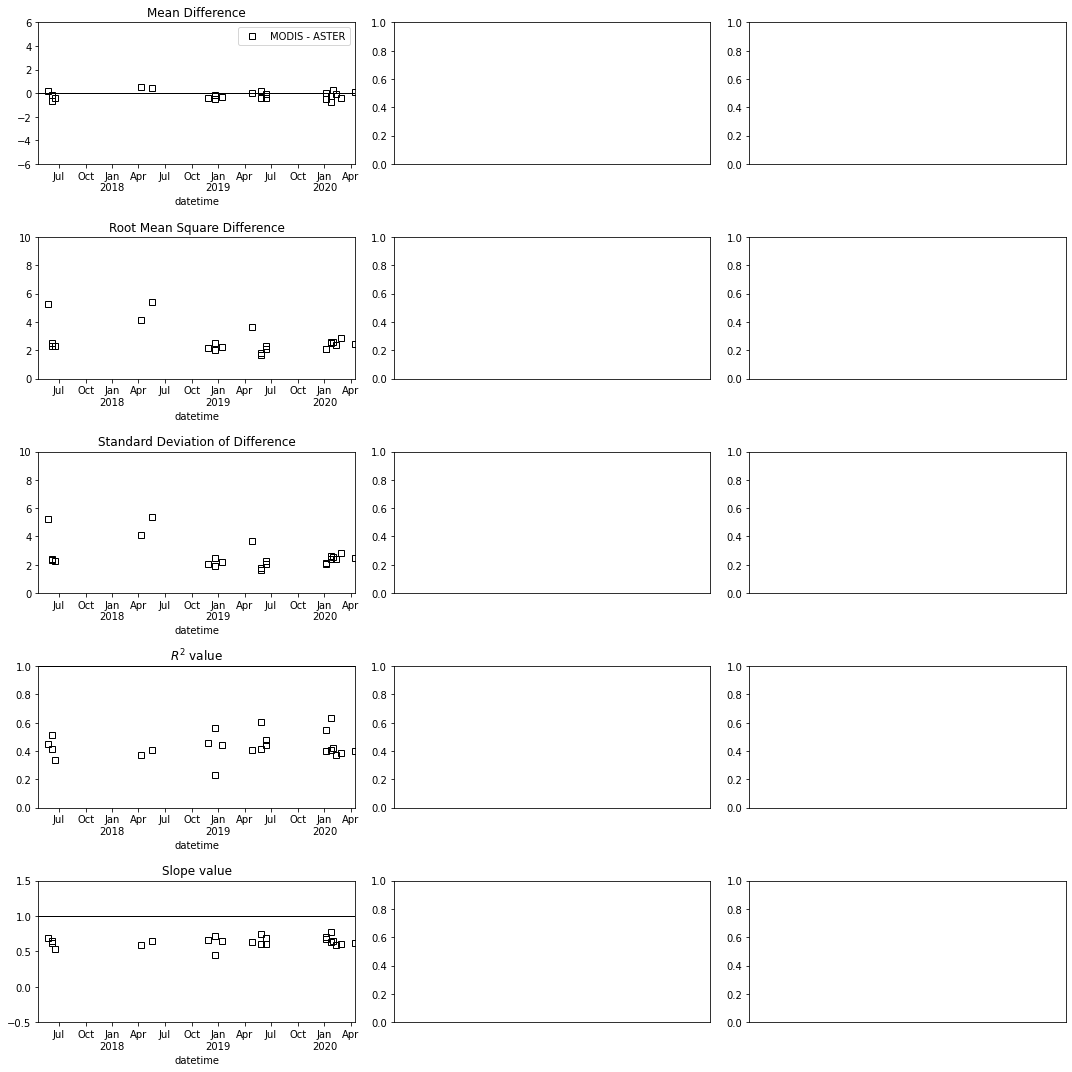

In [9]:
fig, axes = plt.subplots(5,3,figsize=(15,15), tight_layout=True)

ax = axes.flatten()

### Original stats

df_original_tb.ast_mod_mean_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[0], label='MODIS - ASTER')
ax[0].set_title('Mean Difference')
ax[0].set_ylim(-6,6)
ax[0].axhline(0,c='k',linewidth=1)
ax[0].legend()

df_original_tb.ast_mod_rms_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[3], label='MODIS - ASTER')
ax[3].set_title('Root Mean Square Difference')
ax[3].set_ylim(0,10)
ax[3].axhline(0,c='k',linewidth=1)

df_original_tb.ast_mod_std_diff.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[6], label='MODIS - ASTER')
ax[6].set_title('Standard Deviation of Difference')
ax[6].set_ylim(0,10)

df_original_tb.ast_mod_r2_value.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[9], label='MODIS : ASTER')
ax[9].set_title('$R^2$ value')
ax[9].set_ylim(0,1)
ax[9].axhline(1,c='k',linewidth=1)

df_original_tb.ast_mod_slope.plot(linestyle='none', marker='s',  mfc='none', mec='k', ax=ax[12], label='MODIS : ASTER')
ax[12].set_title('Slope value')
ax[12].set_ylim(-0.5,1.5)
ax[12].axhline(1,c='k',linewidth=1)



for this_ax in ax:
    format_date_ax(this_ax)
    #this_ax.legend(loc='best')
